## Evaluation Project 10 Zomato Restaurant Project

### By: Sadaf Shamim

### Batch: DS2307

## Problem Statement:

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

### Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv. Country_code.csv contains two variables:

- Country code
- Country name
The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its - ---Restaurant Id. Every Restaurant contains the following variables:

- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- Country Code: Country in which restaurant is located
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
- Longitude: Longitude coordinate of the restaurant's location
- Latitude: Latitude coordinate of the restaurant's location
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people


### Problem statement : In this dataset predict 2 things –
- 1.Average Cost for two
- 2.Price range


### Dataset Link-  
https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
https://github.com/dsrscientist/dataset4/blob/main/zomato.csv


Importing Required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder, PowerTransformer
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
zomato_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',encoding="latin-1")

In [3]:
#Fetching top 5 record
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
#Bottom 5 record
zomato_df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [5]:
zomato_df.shape

(9551, 21)

In [6]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

## Statistical Analysis
Before Going for Statistical exploration of data, first check integrity of data & Missing value

### Data Integrity Check
Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [8]:
zomato_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
for i in zomato_df.columns:
    if zomato_df[i].isnull().sum() !=0:
        print(f'{i} : ', zomato_df[i].isnull().sum())

Cuisines :  9


### Comment
- Cuisines having null values

<AxesSubplot:>

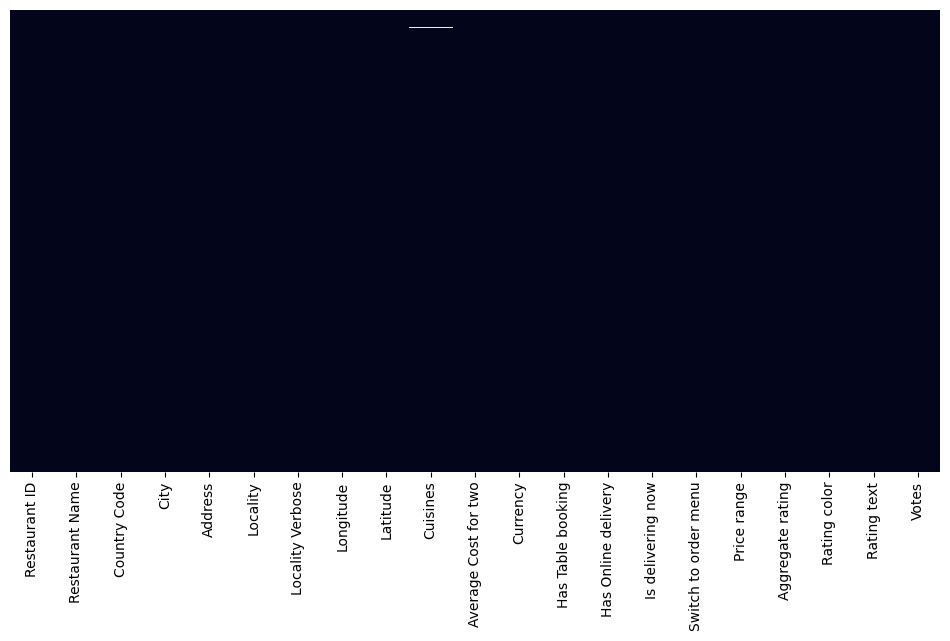

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(zomato_df.isnull(), cbar=False,yticklabels=False)


### Comment:
- There are missing values 

### Importing Country dataset

In [13]:
data_country=pd.read_excel('C:\\Users\\ASUS\\Downloads\\Country-Code.xlsx')
data_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [14]:
data_country.columns

Index(['Country Code', 'Country'], dtype='object')

## Merge the table

In [15]:
final_df=pd.merge(zomato_df,data_country,on='Country Code',how='left')
final_df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [16]:
final_df.dtypes


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [17]:
final_df.Country.value_counts()


India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [18]:
country_name=final_df.Country.value_counts().index
country_name

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [19]:
country_value=final_df.Country.value_counts().values
country_value

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0x1ed2da7ff70>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.392%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.735%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.873%')])

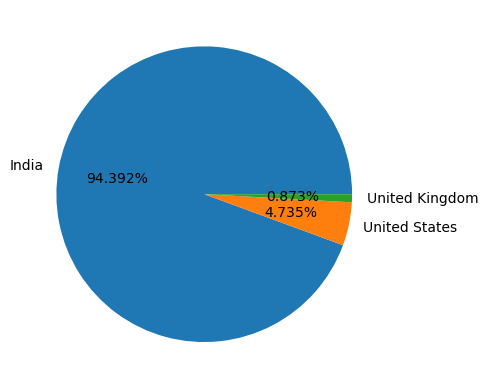

In [20]:
plt.pie(country_value[:3],labels=country_name[:3],autopct='%1.3f%%')


In [21]:
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size()


Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [28]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating counts'})
ratings

,Aggregate rating,Rating color,Rating text,Rating counts
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## observation
- when rating is between 4.5 to 4.9 --------------->Excellent
- when rating is between 4.0 to 4.4--------------->very good
- when rating is between 3.5to 3.9--------------->good
- when rating is between 3.0 to 3.4--------------->average
- when rating is between 2.5 to 2.9--------------->average
- when rating is between 2.0 to 2.4--------------->poor

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating counts'>

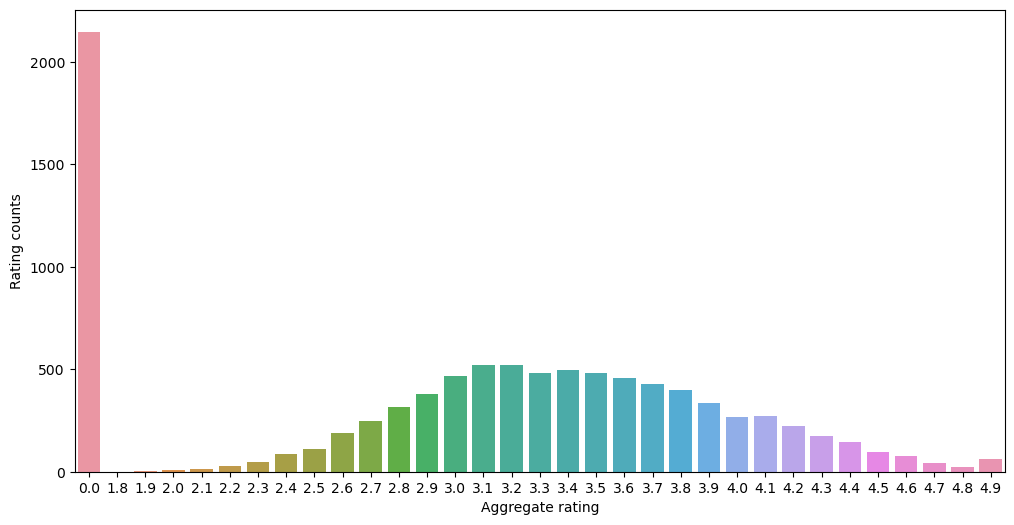

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating counts',data=ratings)


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating counts'>

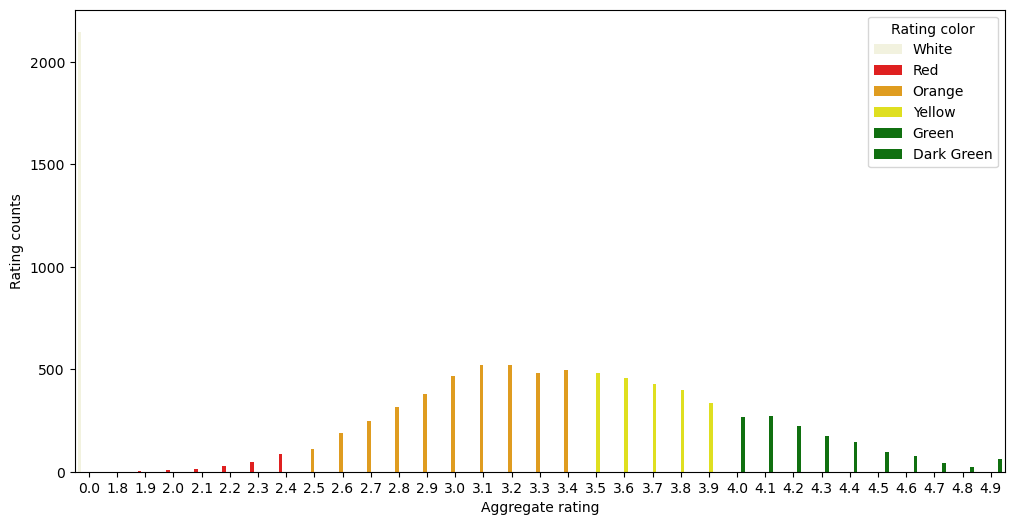

In [30]:
#palette is used to give color as per your reqiirement or color mapping
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating counts',data=ratings,hue='Rating color',palette=['beige','red','orange','yellow','green','green'])


### Comments
- maximum no of ratings between 2.5-3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

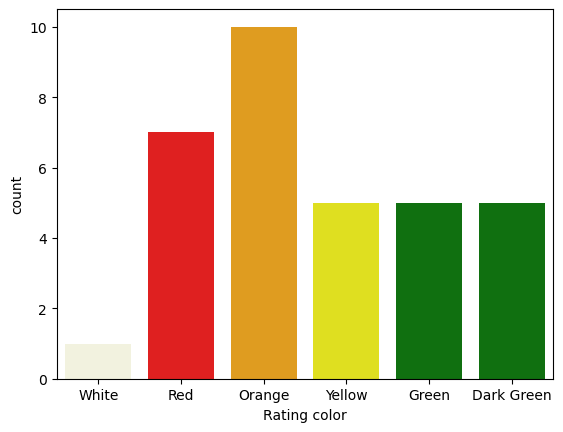

In [31]:
sns.countplot(x='Rating color',data=ratings,palette=['beige','red','orange','yellow','green','green'])


In [32]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [33]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head()


,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [34]:
final_df.groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


### Comments
- maximum no of 0 ratings are from indian customers

In [35]:
final_df.groupby(['Country','Has Online delivery']).size().reset_index()


,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [36]:
final_df[final_df['Has Online delivery']=='Yes'].Country.value_counts()


India    2423
UAE        28
Name: Country, dtype: int64

- online delivery in INDIA and UAE only from given dataset

In [37]:
final_df.groupby(['Has Online delivery']).size().reset_index()


,Has Online delivery,0
0,No,7100
1,Yes,2451


In [38]:
final_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

In [39]:
city_value=final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x1ed307f2550>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.869%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.068%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.590%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.158%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.315%')])

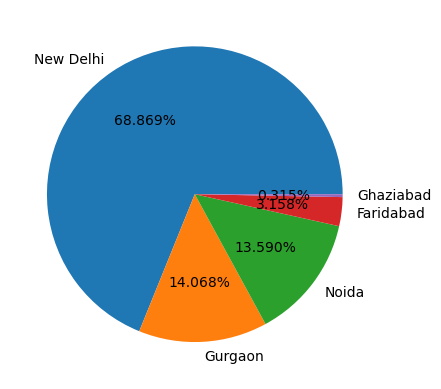

In [40]:
plt.pie(city_value[:5],labels=city_labels[:5],autopct='%1.3f%%')


In [41]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [42]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

# Label Encoding

In [43]:
enc = LabelEncoder()
for i in final_df.columns:
    if final_df[i].dtypes=="object":
        final_df[i]=enc.fit_transform(final_df[i].values.reshape(-1,1))
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749,162,73,8685,171,172,121.027535,14.565443,920,...,1,0,0,0,3,4.8,0,1,314,6
1,6304287,3173,162,73,6055,593,601,121.014101,14.553708,1111,...,1,0,0,0,3,4.5,0,1,591,6
2,6300002,2897,162,75,4684,308,314,121.056831,14.581404,1671,...,1,0,0,0,4,4.4,1,5,270,6
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,0,4,4.9,0,1,365,6
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,...,1,0,0,0,4,4.8,0,1,229,6


# Checking dataset after transformation

In [44]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name           int32
Country Code              int64
City                      int32
Address                   int32
Locality                  int32
Locality Verbose          int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Switch to order menu      int32
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
Country                   int32
dtype: object

## Checking Correlation

In [45]:
final_df.corr()['Average Cost for two'].sort_values()

Latitude               -0.111088
Rating color           -0.049970
City                   -0.028838
Has Online delivery    -0.018974
Locality               -0.012136
Locality Verbose       -0.011852
Country                -0.004034
Is delivering now      -0.001862
Restaurant ID          -0.001693
Cuisines                0.005755
Has Table booking       0.007758
Restaurant Name         0.019241
Address                 0.022749
Rating text             0.031439
Country Code            0.043225
Currency                0.045615
Longitude               0.045891
Aggregate rating        0.051792
Votes                   0.067783
Price range             0.075083
Average Cost for two    1.000000
Switch to order menu         NaN
Name: Average Cost for two, dtype: float64

### Observation
- All columns are sorted in ascending order showing least to strong correlation with target column.
- 9 columns are negatively correlated and 11 columns are positively correlated.
- Columm Price range is highly correlated with Target column 'Average Cost for two' and column Latitude correlated with Target column 'Average Cost for two'


## Checking correlation with heatmap

<AxesSubplot:>

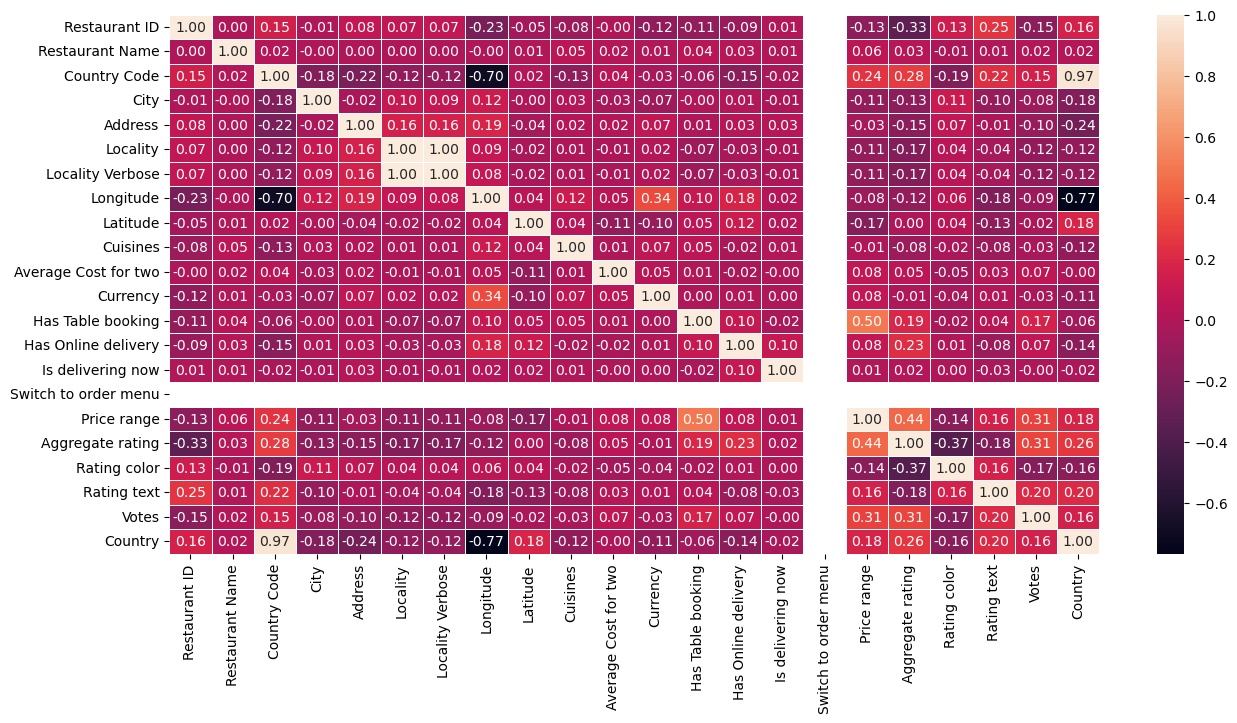

In [46]:
plt.figure(figsize=(15,7))
sns.heatmap(final_df.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')


## Checking correlation with barplot

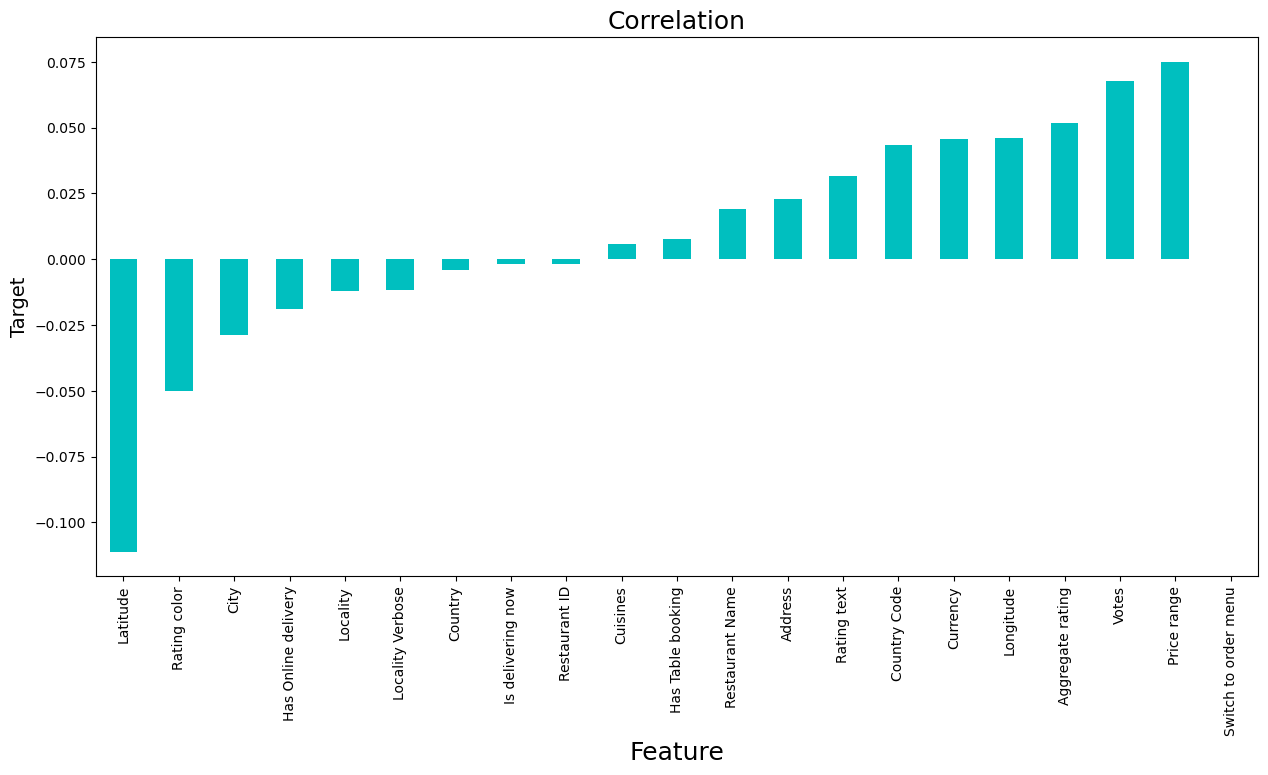

In [47]:
plt.figure(figsize=(15,7))
final_df.corr()['Average Cost for two'].sort_values(ascending=True).drop(['Average Cost for two']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

## Checking Outliers

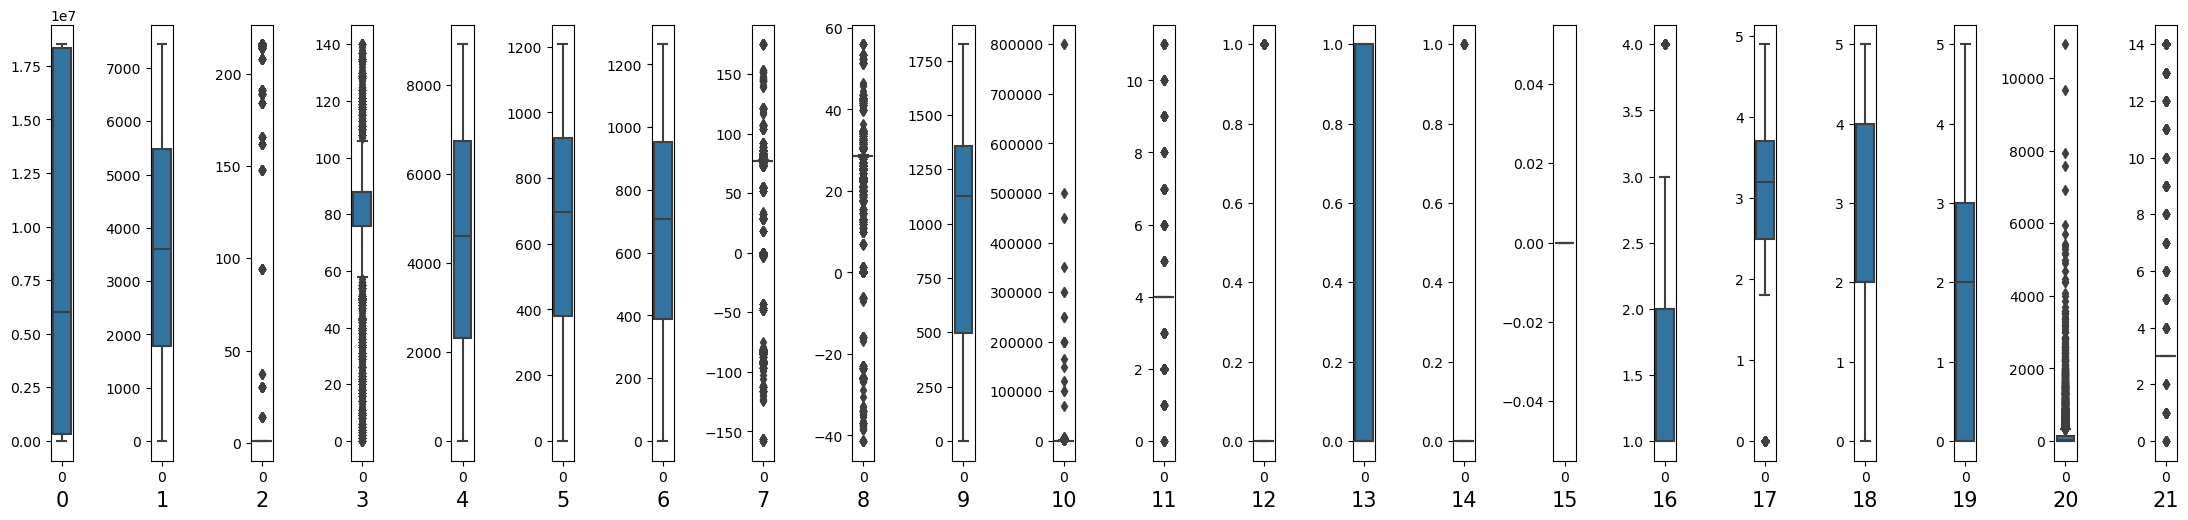

In [48]:
collist=final_df.columns.values
ncol=40
nrows=40
plt.figure(figsize=(ncol,5*ncol))
for column in range(0,len(collist)):
    y=column
    plt.subplot(nrows,ncol,column+1)
    sns.boxplot( data=final_df[collist[column]])
    plt.xlabel(column,fontsize = 15)
    plt.tight_layout()

- We can see that many column having outliers

In [49]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

## Checking for the skewness

In [50]:
final_df.skew()

Restaurant ID            0.061570
Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305484
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

## Observation:
- Skewness threshold taken is +/-0.25
- All the columns are not normallly distributed, they are skewed.


## Checking skweness through Data Visualization

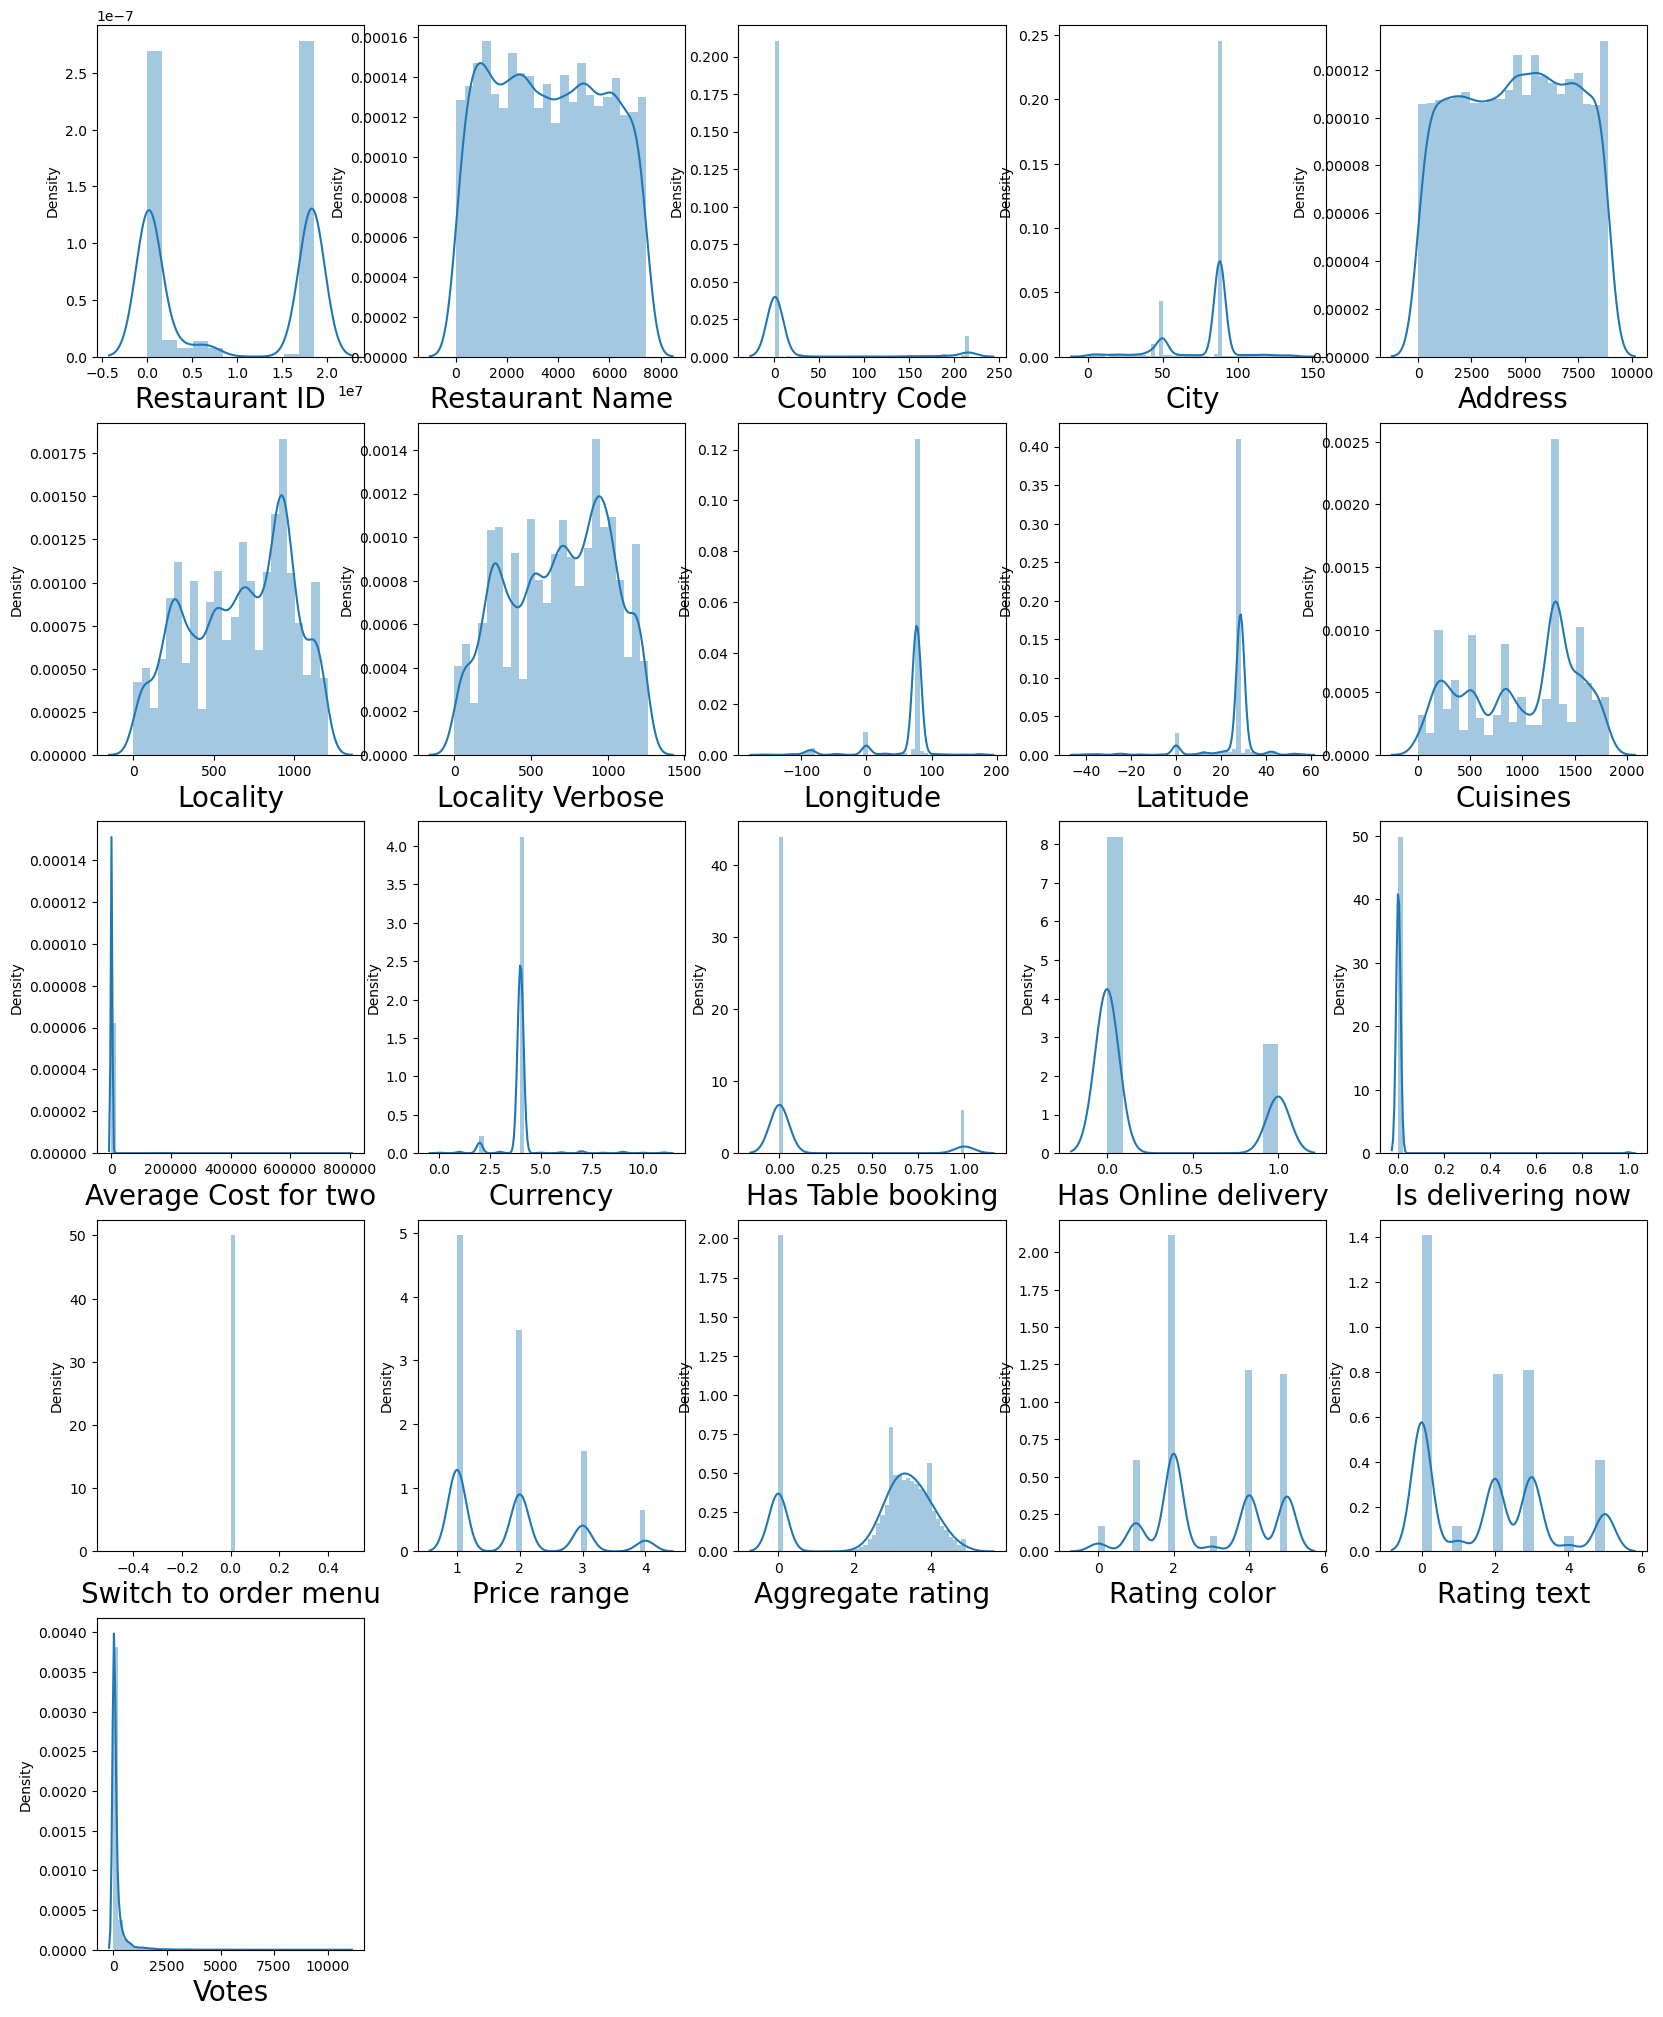

In [51]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in final_df:
    if plotnumber<=21:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(final_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- We can see skewed data


## Removing skewness

In [52]:
collist=['Longitude','Latitude','Aggregate rating','Average Cost for two','Price range']
final_df[collist]=power_transform(final_df[collist],method='yeo-johnson')
final_df[collist]

,Longitude,Latitude,Aggregate rating,Average Cost for two,Price range
0,2.498033,-1.602771,1.833264,0.974401,1.284171
1,2.497306,-1.603989,1.506121,1.060687,1.284171
2,2.499617,-1.601115,1.400030,2.302484,1.706541
3,2.499598,-1.600709,1.945248,1.284065,1.706541
4,2.499653,-1.600799,1.833264,1.284065,1.706541
...,...,...,...,...,...
9546,-1.640540,2.270905,1.090715,-1.416818,1.284171
9547,-1.638445,2.268528,1.192320,-1.187274,1.284171
9548,-1.638664,2.276969,0.699460,-0.769920,1.706541
9549,-1.638619,2.277366,0.990620,-1.072964,1.706541


## checking skewness after removal

In [53]:
final_df.skew()

Restaurant ID            0.061570
Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -0.803832
Latitude                -0.293200
Cuisines                -0.305484
Average Cost for two     0.142365
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.182963
Aggregate rating        -0.610806
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

### checking skewness after removal through data visualization using distplot

<AxesSubplot:xlabel='Average Cost for two', ylabel='Density'>

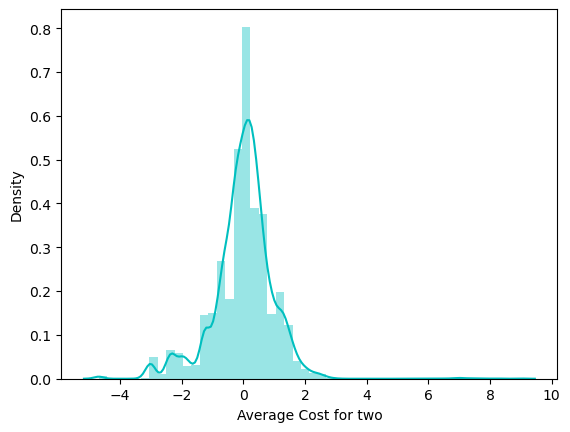

In [54]:
sns.distplot(final_df['Average Cost for two'],color='c')

### Comment
- The data is not normal but the skewness has got removed compared to the old data.

In [55]:
final_df['Average Cost for two'].value_counts()

 0.213077    900
-0.260745    897
 0.004239    857
-0.626123    687
 0.385864    652
            ... 
 3.059374      1
 1.742742      1
 6.632527      1
 5.642178      1
 0.294506      1
Name: Average Cost for two, Length: 140, dtype: int64

In [57]:
# Splitting data in target and dependent feature
X =final_df.drop(['Average Cost for two'], axis =1)
Y = final_df['Average Cost for two']

## Standard Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## checking Multicollinearity between features using variance_inflation_factor

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.287489,Restaurant ID
1,1.008209,Restaurant Name
2,32.966711,Country Code
3,1.088154,City
4,1.114946,Address
5,955.401238,Locality
6,954.457039,Locality Verbose
7,2.474052,Longitude
8,2.206016,Latitude
9,1.047502,Cuisines


#### Strategy to Address Multicollinearity :
- Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
- Another way to address Multicollinerity is to Scaled Data and then apply PCA.
##### We will go by Second way for further investigation. As For some Independent feature VIF is exceed permissible limit of 10.


## PCA

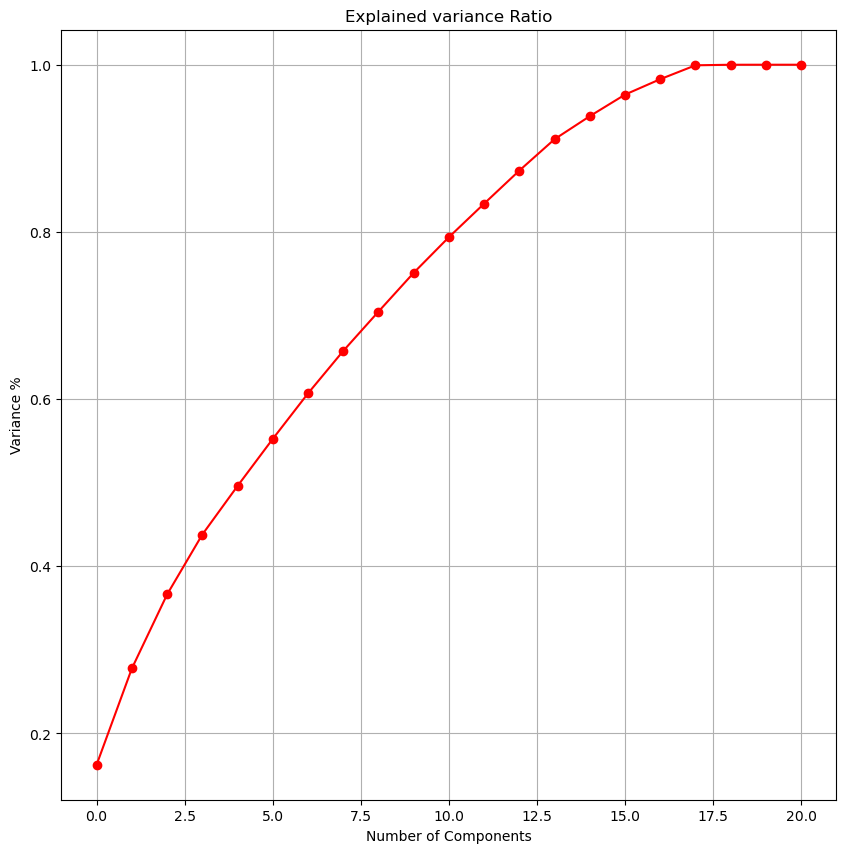

In [60]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

### Comment -
AS per the graph, we can see that 15 principal components attribute for 90% of variation in the data. We shall pick the first 15 components for our prediction.

In [61]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

# Machine Learning Model Building

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score


In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6685, 15)
Training target vector size: (6685,)
Test feature matrix size: (2866, 15)
Test target vector size: (2866,)


## Linear Regression

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=138)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
Y_pred=lin_reg.predict(X_test)
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,Y_pred))
print('Mean squared error :', mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,Y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,Y_pred))

 Error :
Mean absolute error : 0.3617979102328478
Mean squared error : 0.36410135357995144
Root Mean Squared Error: 0.6034081152751855


 R2 Score :
0.6275008331547058


# Applying other Regression Model

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [78]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()


model = [rf,svr,dtc,ad]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    Y_pred = m.predict(X_test)
                                            
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,Y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,Y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,Y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,Y_pred)) 
    print('\n')

 Error of  RandomForestRegressor() :
Mean absolute error : 0.28356241797959525
Mean squared error : 0.19493258242406014
Root Mean Squared Error: 0.4415117013444379


 R2 Score :
0.8005713963158354


 Error of  SVR() :
Mean absolute error : 0.2542814583336327
Mean squared error : 0.18042230640864845
Root Mean Squared Error: 0.42476147001422865


 R2 Score :
0.8154163444965876


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.404271541711233
Mean squared error : 0.458192703482202
Root Mean Squared Error: 0.6768993303898313


 R2 Score :
0.5312393139339564


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.5642687637697014
Mean squared error : 0.5955312021976045
Root Mean Squared Error: 0.771706681451965


 R2 Score :
0.3907331723218318




- Based on the results of evaluation, the Random Forest Regressor model has the best performance in terms of the R-squared (R2) score and Cross-Validated RMSE.

# Cross Validation Score

In [80]:
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()

model = [lin_reg,rf,svr,dtc,ad]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    Y_pred = m.predict(X_test)
    score = cross_val_score(m, X, Y, cv = 5)
    print('Regression ML Algorithm Evaluation Matrix',m,'is' )
    print('\n')
    print('\033[1m'+'Cross Validation Score :'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')

Regression ML Algorithm Evaluation Matrix LinearRegression() is


Cross Validation Score :

Score : [ 0.62650959  0.75985621  0.74318914  0.77033414 -0.75973674]
Mean Score : 0.42803046782525467
Std deviation : 0.5961191164114913


Regression ML Algorithm Evaluation Matrix RandomForestRegressor() is


Cross Validation Score :

Score : [0.06467324 0.84396077 0.83740425 0.87464953 0.21297441]
Mean Score : 0.5667324408828803
Std deviation : 0.352743502225373


Regression ML Algorithm Evaluation Matrix SVR() is


Cross Validation Score :

Score : [ 0.08026512 -0.12411935 -0.06944385 -0.07333787 -0.03074733]
Mean Score : -0.04347665430589598
Std deviation : 0.06861966996453911


Regression ML Algorithm Evaluation Matrix DecisionTreeRegressor() is


Cross Validation Score :

Score : [-0.10181897  0.73420077  0.69117373  0.76343414 -0.02920392]
Mean Score : 0.4115571490344667
Std deviation : 0.3908777610677204


Regression ML Algorithm Evaluation Matrix AdaBoostRegressor() is


Cross Validati

# Hyperparameter Tuning: Random Forest Regressor

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
}

rf_reg_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_reg_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_

print("Best Hyperparameters for rf_reg_model:", best_params)



Best Hyperparameters for rf_reg_model: {'max_depth': 5, 'n_estimators': 50}


# Final Model

In [84]:
Final_mod = RandomForestRegressor(n_estimators= 50, max_depth=5)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print(r2_score(Y_test,Y_pred)) 

0.40414115913659343


# Saving model

In [85]:
import joblib
joblib.dump(Final_mod,'Zomato_restaurant_Final.pkl')

['Zomato_restaurant_Final.pkl']

# Predicting the Final Model

In [86]:
# Prediction
prediction = Final_mod.predict(X_test)

In [87]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1.106732,2.065463
1,1.106732,1.284065
2,-0.103348,0.213077
3,-0.369131,-0.626123
4,-1.042407,-2.206857


# Part Two - Predicting Price Range

In [88]:
X = final_df.drop(['Price range'], axis=1)
Y = final_df['Price range']
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.2, random_state=42)


In [94]:
Y.value_counts()


-1.015939    4444
 0.548245    3113
 1.284171    1408
 1.706541     586
Name: Price range, dtype: int64

# Machine Learning Model Building

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score


In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6685, 21)
Training target vector size: (6685,)
Test feature matrix size: (2866, 21)
Test target vector size: (2866,)


# Linear Regression

In [89]:

X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=138)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
Y_pred=lin_reg.predict(X_test)
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,Y_pred))
print('Mean squared error :', mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,Y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,Y_pred))

 Error :
Mean absolute error : 0.34669193735679343
Mean squared error : 0.19619043592341226
Root Mean Squared Error: 0.4429338956587227


 R2 Score :
0.8032245801557967


# Applying other Regression Model

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
print(r2_score(Y_test,Y_pred)) 
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()


model = [rf,svr,dtc,ad]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    Y_pred = m.predict(X_test)
                                            
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,Y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,Y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,Y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,Y_pred)) 
    print('\n')

0.8032245801557967
 Error of  RandomForestRegressor() :
Mean absolute error : 0.17713903932611932
Mean squared error : 0.09618901903770934
Root Mean Squared Error: 0.31014354585854165


 R2 Score :
0.9035241727433839


 Error of  SVR() :
Mean absolute error : 0.10246910296833762
Mean squared error : 0.028920093398642904
Root Mean Squared Error: 0.17005908796251645


 R2 Score :
0.9709936751316814


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.20391695262262138
Mean squared error : 0.24947634939475008
Root Mean Squared Error: 0.4994760748972368


 R2 Score :
0.7497797832891563


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.6026973622290452
Mean squared error : 0.4115660205373063
Root Mean Squared Error: 0.6415341148663151


 R2 Score :
0.5872068069798705




- Based on the results of evaluation, the Random Forest Regressor model has the best performance in terms of the R-squared (R2) score and Cross-Validated RMSE.


# Cross Validation Score


In [93]:
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()

model = [lin_reg,rf,svr,dtc,ad]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    Y_pred = m.predict(X_test)
    score = cross_val_score(m, X, Y, cv = 5)
    print('Regression ML Algorithm Evaluation Matrix',m,'is' )
    print('\n')
    print('\033[1m'+'Cross Validation Score :'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')

Regression ML Algorithm Evaluation Matrix LinearRegression() is


Cross Validation Score :

Score : [-0.08752623  0.67751597  0.65014177  0.69738607 -1.1626785 ]
Mean Score : 0.15496781460195547
Std deviation : 0.7221449383022309


Regression ML Algorithm Evaluation Matrix RandomForestRegressor() is


Cross Validation Score :

Score : [0.64134181 0.97421261 0.99991791 0.99975904 0.46719057]
Mean Score : 0.8164843887167796
Std deviation : 0.2212675936120683


Regression ML Algorithm Evaluation Matrix SVR() is


Cross Validation Score :

Score : [-0.47467757 -0.19265135 -0.28416425 -0.28747368  0.01209035]
Mean Score : -0.24537529954235976
Std deviation : 0.15806629261546523


Regression ML Algorithm Evaluation Matrix DecisionTreeRegressor() is


Cross Validation Score :

Score : [-0.05796489  0.9650192   1.          0.99958772  0.39660528]
Mean Score : 0.660649461352406
Std deviation : 0.42633432565083784


Regression ML Algorithm Evaluation Matrix AdaBoostRegressor() is


Cross Validat

# Hyperparameter Tuning: Random Forest Regressor


In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
}

rf_reg_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_reg_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_

print("Best Hyperparameters for rf_reg_model:", best_params)



Best Hyperparameters for rf_reg_model: {'max_depth': 5, 'n_estimators': 50}


# Final Model

In [100]:
Final_mod = RandomForestRegressor(n_estimators= 50, max_depth=5)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print(r2_score(Y_test,Y_pred)) 

-0.2564326680288238


# Saving model


In [101]:
import joblib
joblib.dump(Final_mod,'Zomato_restaurant_ price_Final.pkl')

['Zomato_restaurant_ price_Final.pkl']

In [ ]:
# Predicting the Final Model

In [102]:
# Prediction
prediction = Final_mod.predict(X_test)
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,-0.249653,0.548245
1,0.791415,1.284171
2,1.010191,1.284171
3,-0.674843,-1.015939
4,0.915967,1.706541
